# Raghavendra Kharosekar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [ ]:
df1 = pd.read_csv('df.csv')

Dropping any Null values if present

In [ ]:
df1 = df1.dropna()

We will create 2 sets viz. Train Set & Test Set 

In [ ]:
train_set = df1[:500]
ts= train_set
test_set = df1[500:]
ts1 = test_set


Plotting X vs Y

Text(0.5, 1.0, 'X vs Y plot')

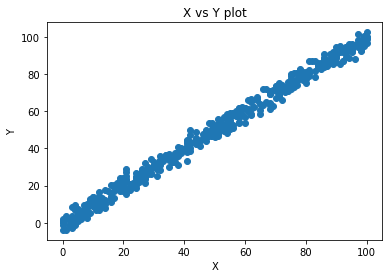

In [ ]:
plt.scatter(ts['x'],ts['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y plot')

Above figure shows that there is almost a very strong linear relation between 'X' and 'Y'

We first use 'Linear Regression' to find an appropriate fit. We train the algorithm using the Train Set 'ts'.

In [ ]:
X1 = ts['x'].values.reshape(-1,1)
Y1 = ts['y'].values.reshape(-1,1)
eqn = LinearRegression()
eqn.fit(X1, Y1)
print("The linear model is: Y = {} + {}X".format(eqn.intercept_[0], eqn.coef_[0][0]))

The linear model is: Y = -0.236034614887906 + 1.000999297243876X


We predict the values using the Test Set 'ts1' to provide an unbiased evaluation of a final model fit on the training dataset. 

In [ ]:
ts12 = ts1['x'].values.reshape(-1,1)
pred = eqn.predict(ts12)
eqn.score(pred,ts1['y'])

0.990646060120735

The Score is very close to 1. Therefore we can interpret that the prediction is very very accurate (~ 99.06% accuracy)

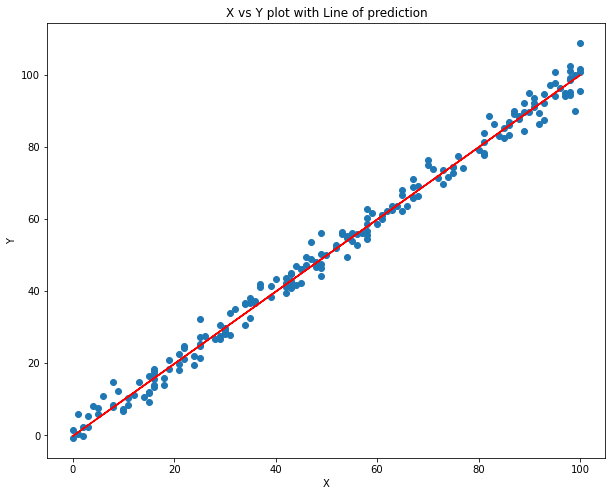

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(ts1['x'],ts1['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y plot with Line of prediction')
plt.plot(ts1['x'],pred,c='red')

The Red line in the above graph is the fit. It can be seen that it is neither an over-fit nor an under-fit

Use of Polynomial Regression to overcome under fitting (if any)

In [ ]:
poly_feat_2 = PolynomialFeatures(degree=2)

Predicting a model with degree=2 polynomial features usinng the Training set 'ts'

In [ ]:
X_train_set_2 = poly_feat_2.fit_transform(ts['x'].values.reshape(-1, 1))
Y_train_set_2 = ts['y'].values.reshape(-1, 1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_set_2,Y_train_set_2)

LinearRegression()

Predicting the values on the test Set 'ts1'.

In [ ]:
X_2_pred = poly_feat_2.fit_transform(ts1['x'].values.reshape(-1, 1))
y_2_pred = lin_reg_2.predict(X_2_pred)
print(r2_score(ts1['y'].values, y_2_pred))
print("Y = {:.5f} +{:.5f}x +{:.5f}x^2 is the equation of the fit".format(lin_reg_2.intercept_[0],lin_reg_2.coef_[0][1],lin_reg_2.coef_[0][2]))

0.9908166048085085
Y = -0.65062 +1.02524x +-0.00024x^2 is the equation of the fit


The R^2 Score is even better than the one from Linear Regression. Therefore lin_reg_2is even a better fit with accuracy~99.08%!

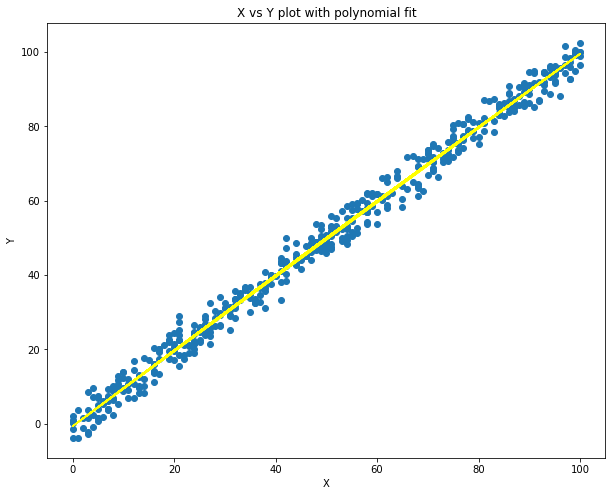

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(ts['x'],ts['y']);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y plot with polynomial fit')
plt.plot(ts1['x'].values, y_2_pred,c='yellow');

It can be seen that the fit(red line) is ALMOST linear.

Implementation of Ridge Regression (Regularisation) to find the 'sweet spot'

In [ ]:
eqn_ridge = RidgeCV(alphas=list(range(1,50)))
eqn_ridge.fit(X_train_set_2,Y_train_set_2)

RidgeCV(alphas=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [ ]:
eqn_ridge.alpha_

5

We find the best Alpha for the fit using RidgeCV. The Alpha that gives the best fit is 5

We implement it on the Train set 'ts'

In [ ]:
y_ridge_pred=eqn_ridge.predict(X_2_pred)
print(r2_score(ts1['y'].values, y_ridge_pred))
print("Y = {:.5f} +{:.5f}x +{:.5f}x^2 is the equation of the ridge regression fit".format(eqn_ridge.intercept_[0],eqn_ridge.coef_[0][1],eqn_ridge.coef_[0][2]))

0.9908172093988518
Y = -0.64689 +1.02504x +-0.00024x^2 is the equation of the ridge regression fit


The R^2 score is slighly higher than that of polynomial regression. We can interpret that the accuracy is 0.00006046 greater!

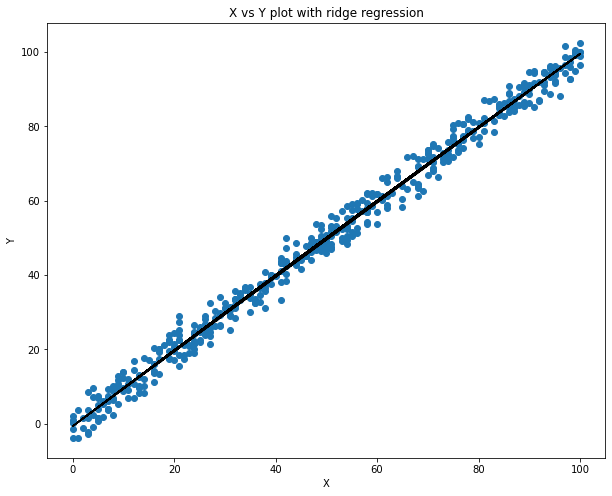

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(ts['x'],ts['y']);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y plot with ridge regression')
plt.plot(ts1['x'].values, y_ridge_pred,c='black');


Plotting a common graph for all 3 algos, to compare the fits

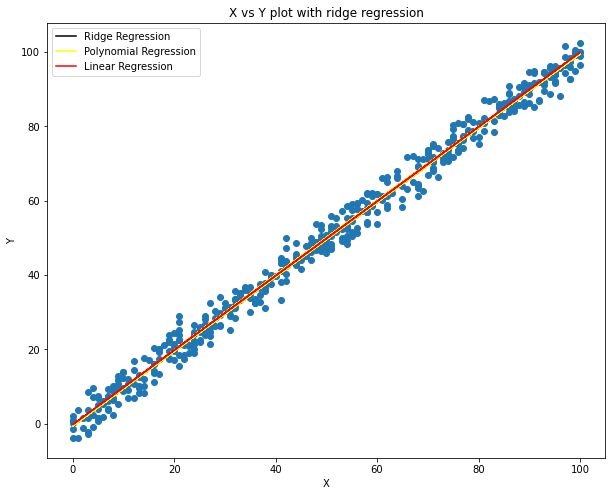

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(ts['x'],ts['y']);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y plot with ridge regression')
plt.plot(ts1['x'].values, y_ridge_pred,c='black', label = 'Ridge Regression');
plt.plot(ts1['x'].values, y_2_pred,c='yellow', label = 'Polynomial Regression');
plt.plot(ts1['x'],pred,c='red', label = 'Linear Regression')
plt.legend()

CONCLUSION:

1) All the 3 fits almost Overlap

2) The R^2 score of Ridge Regression is the highest. Therefore it is the best Fit!

3) Alpha = 5 gives the best fit in Ridge Regression

4) The coefficient of x^2 in Polynomial and ridge regression is almost equal to 0. So, we can say that, 'X and Y have a Linear Relationship!'  